<a href="https://colab.research.google.com/github/buzzudit/Learning-Deep-Learning/blob/master/CNN/CNN_augmentation_with_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install -q tensorflow-gpu -U

In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense,  Flatten, Dropout, BatchNormalization, GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

In [8]:
cifar10 = tf.keras.datasets.cifar10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
y_train, y_test = y_train.flatten(), y_test.flatten()
x_train, x_test = x_train/255.0, x_test/255.0
print("x_train.shape:", x_train.shape)
print("y_train.shape:", y_train.shape)

x_train.shape: (50000, 32, 32, 3)
y_train.shape: (50000,)


In [9]:
K = len(set(y_train))
print(f"number of classes:{K}")

number of classes:10


In [15]:
i = Input(shape=x_train[0].shape)

x = Conv2D(32, (3,3), activation='relu', padding = 'same' )(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3,3), activation='relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
#x = Dropout(0.2)(x)

x = Conv2D(64, (3,3), activation='relu', padding = 'same' )(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3,3), activation='relu', padding = 'same' )(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
#x = Dropout(0.2)(x)

x = Conv2D(128, (3,3), activation='relu', padding = 'same' )(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3,3), activation='relu', padding = 'same' )(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
#x = Dropout(0.2)(x)

#x = GlobalMaxPooling2D()(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i,x)

model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

In [16]:
r = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=50)

Epoch 1/50
1563/1563 [==============================] - 23s 15ms/step - loss: 1.2793 - accuracy: 0.5587 - val_loss: 1.3354 - val_accuracy: 0.5611
Epoch 2/50
1563/1563 [==============================] - 23s 15ms/step - loss: 0.8397 - accuracy: 0.7078 - val_loss: 0.8401 - val_accuracy: 0.7159
Epoch 3/50
1563/1563 [==============================] - 23s 15ms/step - loss: 0.6817 - accuracy: 0.7664 - val_loss: 0.7553 - val_accuracy: 0.7369
Epoch 4/50
1563/1563 [==============================] - 23s 15ms/step - loss: 0.5769 - accuracy: 0.8023 - val_loss: 0.6434 - val_accuracy: 0.7865
Epoch 5/50
1563/1563 [==============================] - 23s 15ms/step - loss: 0.4920 - accuracy: 0.8320 - val_loss: 0.7088 - val_accuracy: 0.7707
Epoch 6/50
1563/1563 [==============================] - 23s 15ms/step - loss: 0.4177 - accuracy: 0.8576 - val_loss: 0.6927 - val_accuracy: 0.7891
Epoch 7/50
1563/1563 [==============================] - 23s 15ms/step - loss: 0.3598 - accuracy: 0.8758 - val_loss: 0.5953 -

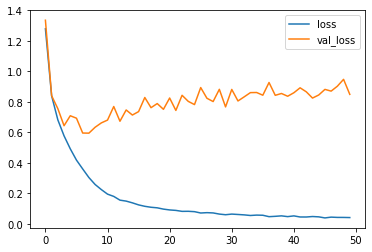

In [17]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

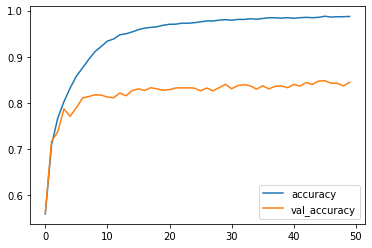

In [18]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()